In [1]:
import pandas as pd
import datetime
import json

In [2]:
with open('transaction-data-adhoc-analysis.json','r') as f:
    data=json.load(f)

In [3]:
transactionsdf=pd.DataFrame(data)

In [4]:
transactionsdf

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date
0,USNS Wagner\nFPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"Exotic Extras,Beef Chicharon,(x4)",5196,2022/01/12
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...",12056,2022/01/12
2,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Gummy Vitamins,(x3);HealthyKid 3...",5500,2022/01/08
3,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Yummy Vegetables,(x1)",500,2022/01/10
4,"33911 Hansen Loaf\nWest Sandra, ND 54188",1949/09/27,michael78@yahoo.com,Kristen Cooper,F,qhernandez,"Candy City,Orange Beans,(x3);Candy City,Gummy ...",2697,2022/01/24
...,...,...,...,...,...,...,...,...,...
83031,"96081 Harrison Brooks\nJenniferbury, MA 02124",2019/10/26,christina55@hotmail.com,Tammy Byrd,F,kmcconnell,"Exotic Extras,Kimchi and Seaweed,(x2);HealthyK...",3588,2022/06/05
83032,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Yummy Vegetables,(x1);Exotic Ext...",2095,2022/06/12
83033,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"Candy City,Orange Beans,(x4);Candy City,Gummy ...",3396,2022/06/15
83034,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Nutrional Milk,(x2);Candy City,G...",4280,2022/06/09


In [5]:
transactions_trial=transactionsdf[["transaction_value","transaction_date"]]

In [6]:
transactions_trial

,transaction_value,transaction_date
0,5196,2022/01/12
1,12056,2022/01/12
2,5500,2022/01/08
3,500,2022/01/10
4,2697,2022/01/24
...,...,...
83031,3588,2022/06/05
83032,2095,2022/06/12
83033,3396,2022/06/15
83034,4280,2022/06/09


In [7]:
transactions_trial["month"]=pd.DatetimeIndex(transactions_trial['transaction_date']).month

/var/folders/n1/vl98150x7gz4l5g4l74pjhqh0000gn/T/ipykernel_9233/2188474626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions_trial["month"]=pd.DatetimeIndex(transactions_trial['transaction_date']).month


In [8]:
transactions_trial

,transaction_value,transaction_date,month
0,5196,2022/01/12,1
1,12056,2022/01/12,1
2,5500,2022/01/08,1
3,500,2022/01/10,1
4,2697,2022/01/24,1
...,...,...,...
83031,3588,2022/06/05,6
83032,2095,2022/06/12,6
83033,3396,2022/06/15,6
83034,4280,2022/06/09,6


In [9]:
def get_transaction_interval(x):
    if x>=17500:
        return str("Between 17,500 and 20,000")
    elif x>=15000:
        return str("Between 15,000 and 17,499")
    elif x>=12500:
        return str("Between 12,500 and 14,999")
    elif x>=10000:
        return str("Between 10,000 and 12,499")
    elif x>=7500:
        return str("Between 7,500 and 9,999")
    elif x>=5000:
        return str("Between 5,000 and 7,499")
    elif x>=2500:
        return str("Between 2,500 and 4,999")
    elif x>=1000:
        return str("Between 1,000 and 2,499")
    elif x>=0:
        return str("<1,000")

In [10]:
transactions_trial["Transaction_Interval"]=transactionsdf["transaction_value"].apply(get_transaction_interval)

/var/folders/n1/vl98150x7gz4l5g4l74pjhqh0000gn/T/ipykernel_9233/1878890510.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions_trial["Transaction_Interval"]=transactionsdf["transaction_value"].apply(get_transaction_interval)


In [11]:
transactions_trial

,transaction_value,transaction_date,month,Transaction_Interval
0,5196,2022/01/12,1,"Between 5,000 and 7,499"
1,12056,2022/01/12,1,"Between 10,000 and 12,499"
2,5500,2022/01/08,1,"Between 5,000 and 7,499"
3,500,2022/01/10,1,"<1,000"
4,2697,2022/01/24,1,"Between 2,500 and 4,999"
...,...,...,...,...
83031,3588,2022/06/05,6,"Between 2,500 and 4,999"
83032,2095,2022/06/12,6,"Between 1,000 and 2,499"
83033,3396,2022/06/15,6,"Between 2,500 and 4,999"
83034,4280,2022/06/09,6,"Between 2,500 and 4,999"


In [12]:
new_interval_2=transactions_trial.groupby(["Transaction_Interval"]).size().reset_index(name='Count')


In [13]:
count_for_transaction_6=new_interval_2.set_index("Transaction_Interval")

In [14]:
count_for_transaction_6=count_for_transaction_6.reindex(["<1,000","Between 1,000 and 2,499","Between 2,500 and 4,999","Between 5,000 and 7,499","Between 7,500 and 9,999","Between 10,000 and 12,499","Between 12,500 and 14,999","Between 15,000 and 17,499","Between 17,500 and 20,000"])

In [15]:
count_for_transaction_6

,Count
Transaction_Interval,
"<1,000",11478
"Between 1,000 and 2,499",15725
"Between 2,500 and 4,999",22265
"Between 5,000 and 7,499",17561
"Between 7,500 and 9,999",10305
"Between 10,000 and 12,499",4037
"Between 12,500 and 14,999",1368
"Between 15,000 and 17,499",264
"Between 17,500 and 20,000",33


In [17]:
count_for_transaction_6=count_for_transaction_6.reset_index()

In [18]:
count_for_transaction_6

,Transaction_Interval,Count
0,"<1,000",11478
1,"Between 1,000 and 2,499",15725
2,"Between 2,500 and 4,999",22265
3,"Between 5,000 and 7,499",17561
4,"Between 7,500 and 9,999",10305
5,"Between 10,000 and 12,499",4037
6,"Between 12,500 and 14,999",1368
7,"Between 15,000 and 17,499",264
8,"Between 17,500 and 20,000",33


In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

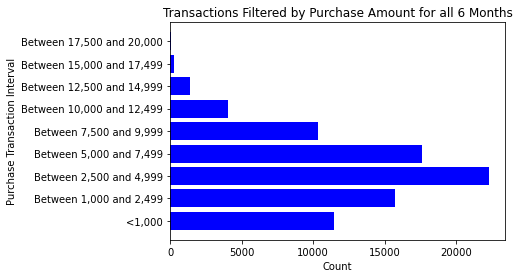

In [21]:
plt.barh(y=count_for_transaction_6["Transaction_Interval"], width=count_for_transaction_6["Count"], color ='b')
plt.xlabel("Count")
plt.ylabel("Purchase Transaction Interval")
plt.title("Transactions Filtered by Purchase Amount for all 6 Months")
plt.savefig('Transactions Bar (1).png', dpi=600, bbox_inches='tight')

In [22]:
trial_table_final=pd.pivot_table(transactions_trial, values=["transaction_value"], index=["Transaction_Interval"], columns="month", aggfunc='count', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False)

In [23]:
trial_table_final

transaction_value                              
month                                     1     2     3     4     5     6
Transaction_Interval                                                     
<1,000                                 1894  1925  1926  1843  1962  1928
Between 1,000 and 2,499                2670  2636  2575  2679  2569  2596
Between 10,000 and 12,499               647   695   666   671   686   672
Between 12,500 and 14,999               231   224   227   235   215   236
Between 15,000 and 17,499                42    39    37    55    40    51
Between 17,500 and 20,000                 1     4     8     8     5     7
Between 2,500 and 4,999                3650  3819  3771  3715  3648  3662
Between 5,000 and 7,499                2784  2964  2965  2875  2966  3007
Between 7,500 and 9,999                1769  1666  1727  1698  1773  1672

In [32]:
pip install dataframe_image

Note: you may need to restart the kernel to use updated packages.


In [33]:
import dataframe_image as dfi

In [35]:
count_for_transaction_6=new_interval_2.set_index("Transaction_Interval")

In [39]:
count_for_transaction_6=count_for_transaction_6.reindex(["<1,000","Between 1,000 and 2,499","Between 2,500 and 4,999","Between 5,000 and 7,499","Between 7,500 and 9,999","Between 10,000 and 12,499","Between 12,500 and 14,999","Between 15,000 and 17,499","Between 17,500 and 20,000"])

In [40]:
count_for_transaction_6

,Count
Transaction_Interval,
"<1,000",11478
"Between 1,000 and 2,499",15725
"Between 2,500 and 4,999",22265
"Between 5,000 and 7,499",17561
"Between 7,500 and 9,999",10305
"Between 10,000 and 12,499",4037
"Between 12,500 and 14,999",1368
"Between 15,000 and 17,499",264
"Between 17,500 and 20,000",33


In [41]:
dfi.export(count_for_transaction_6,"count_for_transaction_6")

[0724/173526.631551:INFO:headless_shell.cc(660)] Written to file /var/folders/n1/vl98150x7gz4l5g4l74pjhqh0000gn/T/tmp0s3jze5b/temp.png.


In [42]:
trial_table_final
trial_table_final=trial_table_final.reindex(["<1,000","Between 1,000 and 2,499","Between 2,500 and 4,999","Between 5,000 and 7,499","Between 7,500 and 9,999","Between 10,000 and 12,499","Between 12,500 and 14,999","Between 15,000 and 17,499","Between 17,500 and 20,000"])

In [43]:
dfi.export(trial_table_final,"interval_count")

[0724/173613.666029:INFO:headless_shell.cc(660)] Written to file /var/folders/n1/vl98150x7gz4l5g4l74pjhqh0000gn/T/tmpi8lvjp2u/temp.png.
